# Load the dataset and Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import shap

In [14]:
filename = "C:\\Users\\Gihan\\Downloads\\archive (4)\\full_data.csv"
df = pd.read_csv(filename)
display(df)

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [15]:
unique_counts = df.nunique()
print(unique_counts)

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64


In [16]:
df.shape

(4981, 11)

In [17]:
null_counts = df.isnull().sum()
print(null_counts)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [19]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [20]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Exploratary Data Analysis

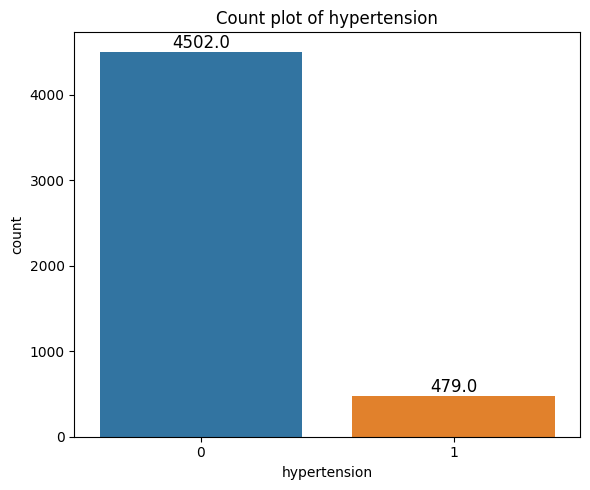

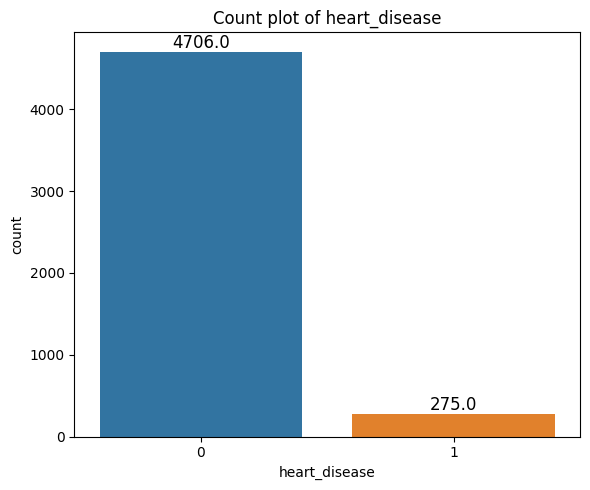

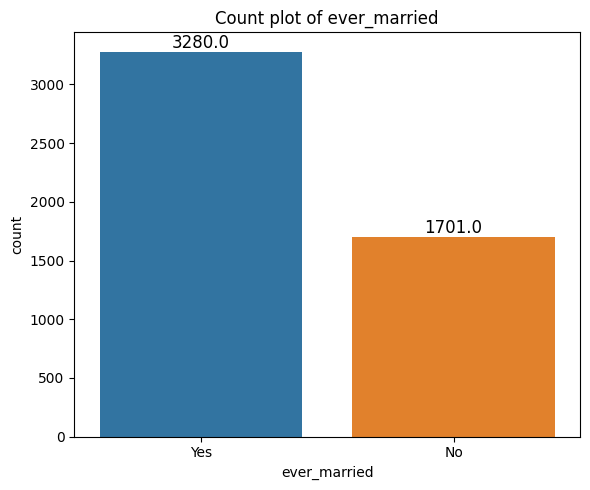

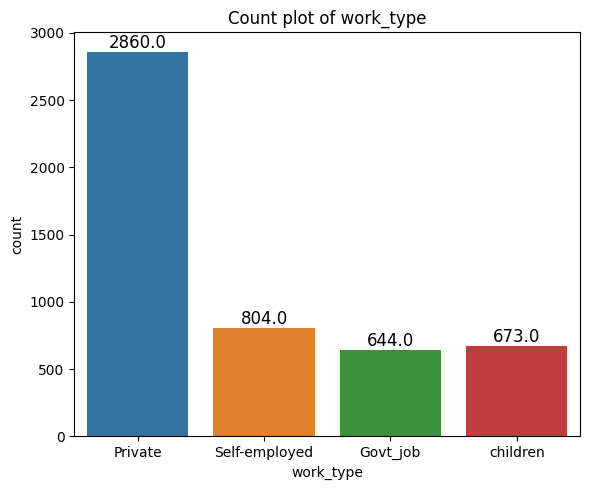

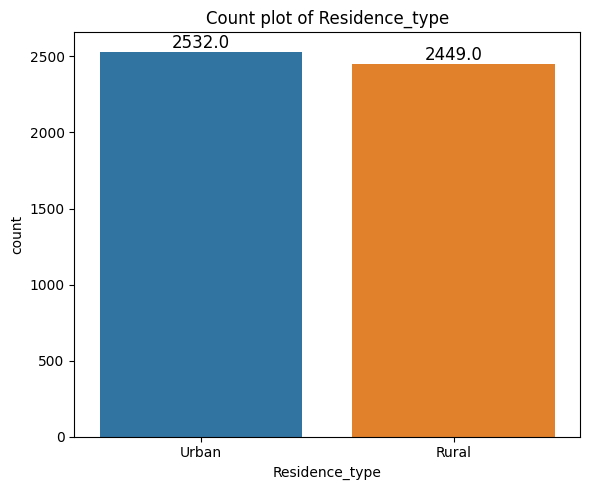

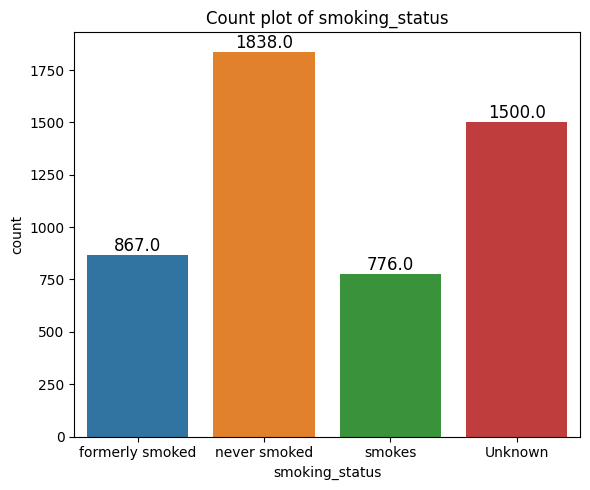

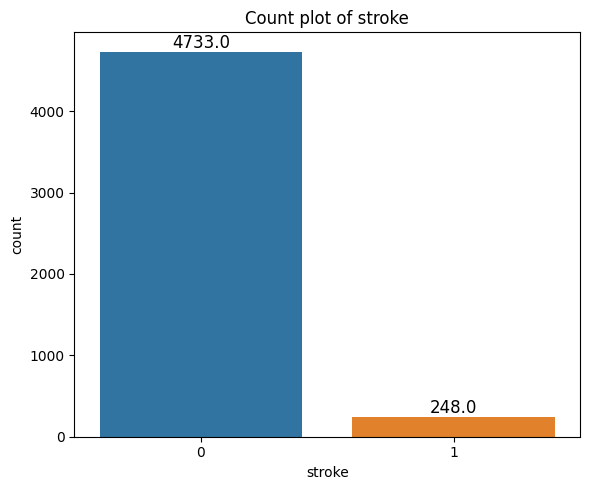

In [21]:
# List of categorical features
categorical_features = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create individual count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(6, 5))
    ax = sns.countplot(data=df, x=feature)
    plt.title(f'Count plot of {feature}')

    # Show counts on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

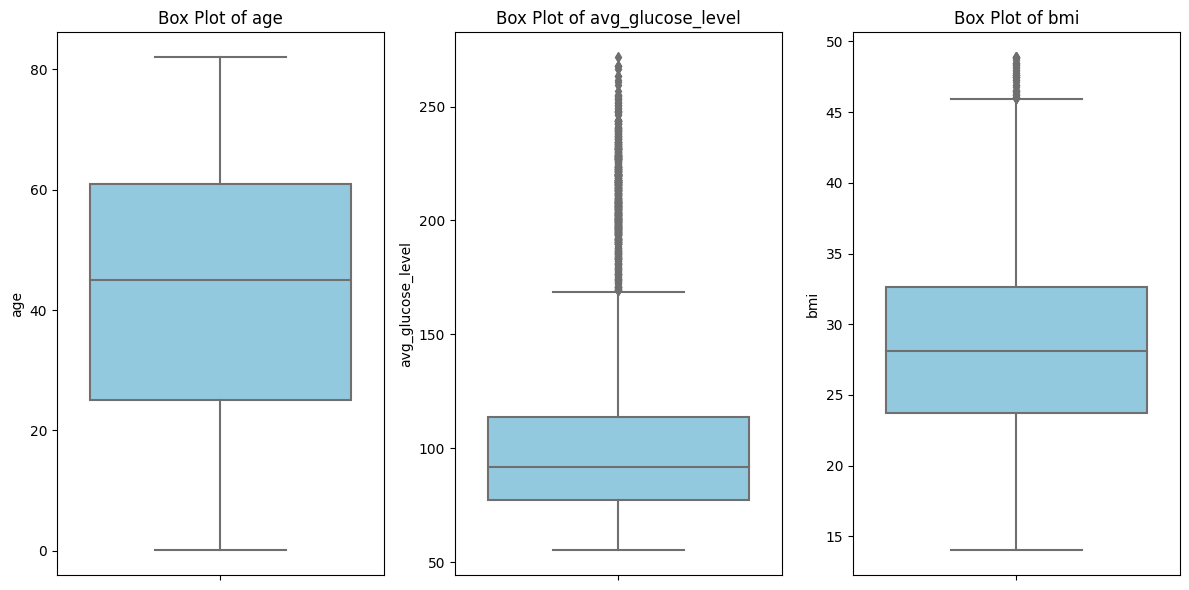

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Assuming df is your DataFrame
df = df[~((df['avg_glucose_level'] - df['avg_glucose_level'].median()).abs() > 1.5 * df['avg_glucose_level'].std())]
df = df[~((df['bmi'] - df['bmi'].median()).abs() > 1.5 * df['bmi'].std())]


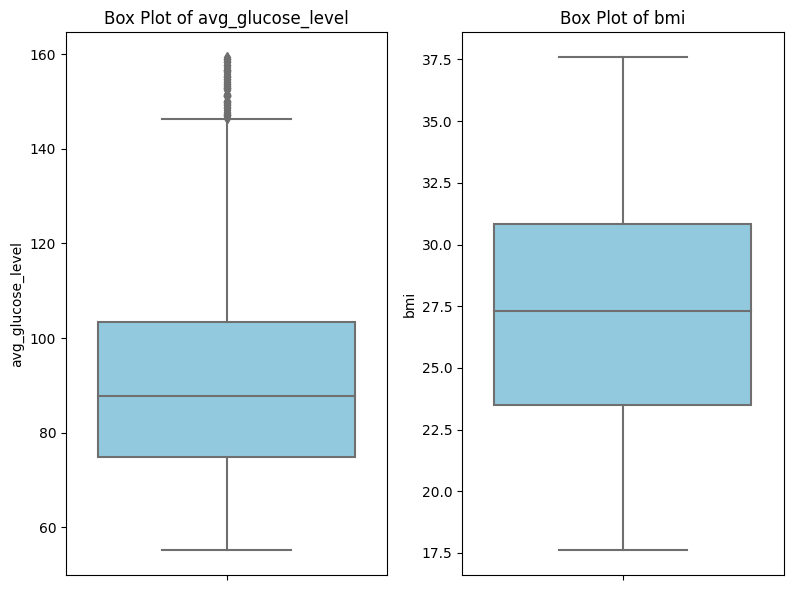

In [24]:
# Assuming 'df' is your DataFrame
columns_to_plot = [ 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [25]:
df 

gender   age  hypertension  heart_disease ever_married work_type  \
1       Male  80.0             0              1          Yes   Private   
5       Male  74.0             1              1          Yes   Private   
6     Female  69.0             0              0           No   Private   
7     Female  78.0             0              0          Yes   Private   
8     Female  81.0             1              0          Yes   Private   
...      ...   ...           ...            ...          ...       ...   
4974    Male  58.0             0              0          Yes  Govt_job   
4976    Male  41.0             0              0           No   Private   
4978  Female  45.0             1              0          Yes  Govt_job   
4979    Male  40.0             0              0          Yes   Private   
4980  Female  80.0             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
1             Rural             105.92  32.5     never smoked       1  
5             Rural              70.09  27.4     never smoked       1  
6             Urban              94.39  22.8     never smoked       1  
7             Urban              58.57  24.2          Unknown       1  
8             Rural              80.43  29.7     never smoked       1  
...             ...                ...   ...              ...     ...  
4974          Urban              84.94  30.2     never smoked       0  
4976          Rural              70.15  29.8  formerly smoked       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[3736 rows x 11 columns]

The figure layout has changed to tight


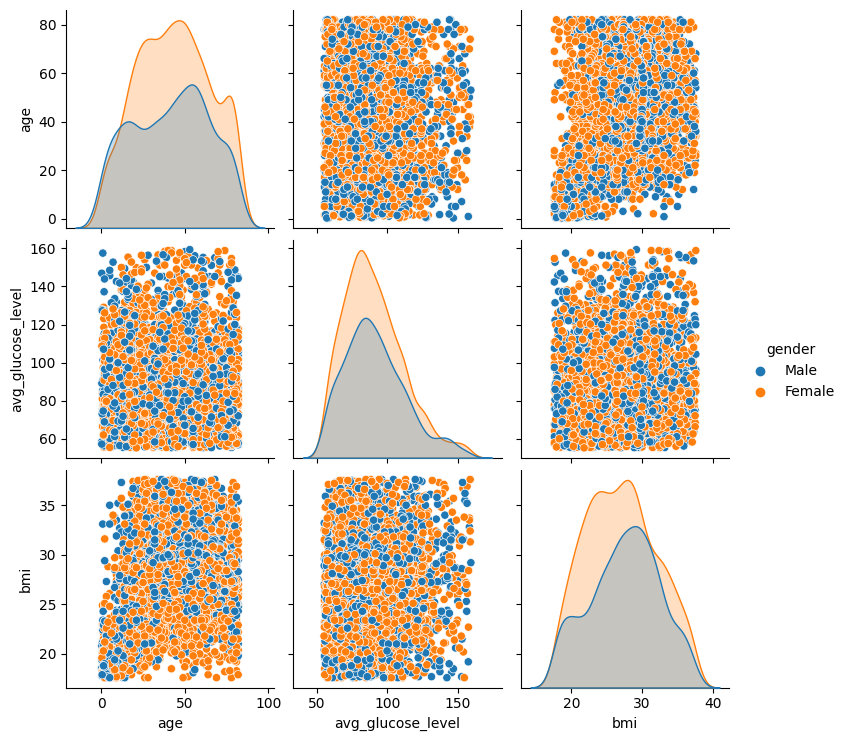

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['age', 'avg_glucose_level', 'bmi']
sns.pairplot(df, vars=numeric_columns, hue='gender')
plt.show()


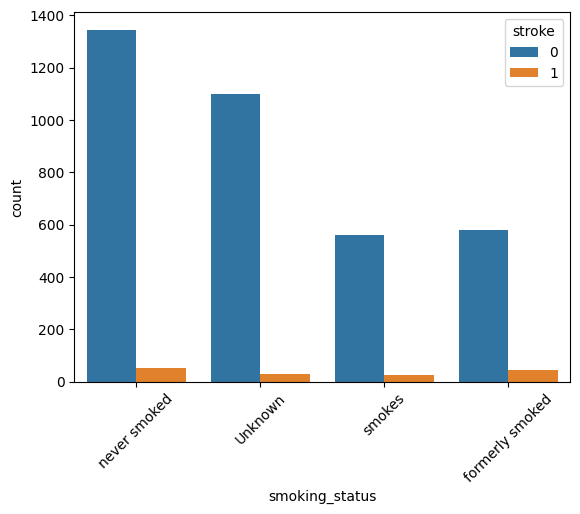

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.xticks(rotation=45)
plt.show()


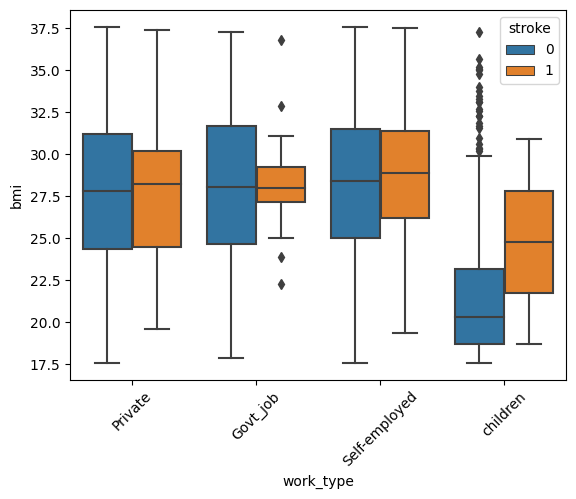

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='work_type', y='bmi', hue='stroke')
plt.xticks(rotation=45)
plt.show()


34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


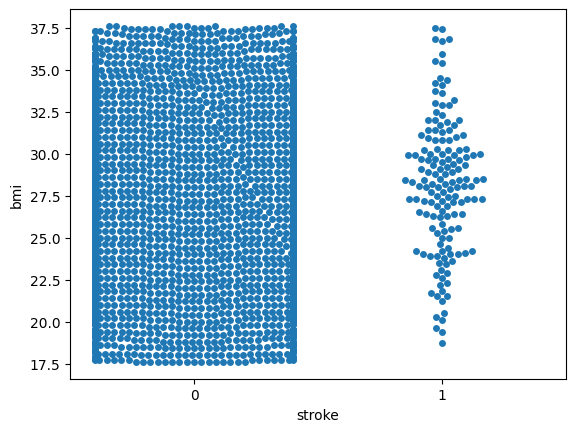

In [29]:
sns.swarmplot(data=df, x='stroke', y='bmi')
plt.show()


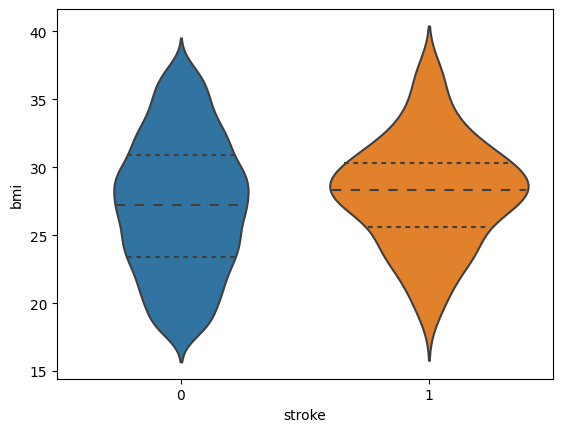

In [30]:
sns.violinplot(data=df, x='stroke', y='bmi', inner='quart')
plt.show()


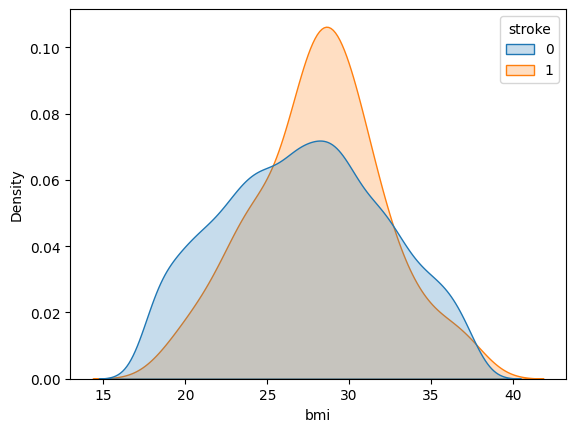

In [31]:
sns.kdeplot(data=df, x='bmi', hue='stroke', common_norm=False, fill=True)
plt.show()


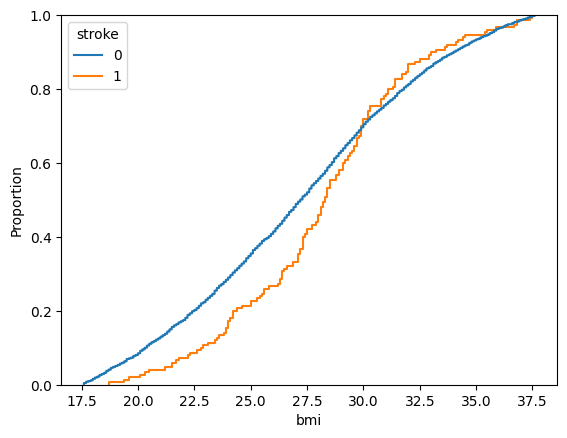

In [32]:
sns.ecdfplot(data=df, x='bmi', hue='stroke')
plt.show()


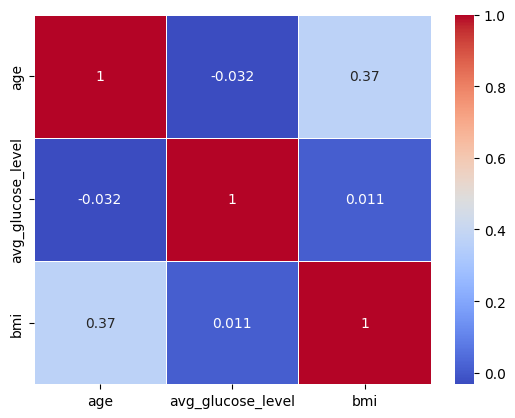

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['age', 'avg_glucose_level', 'bmi']
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


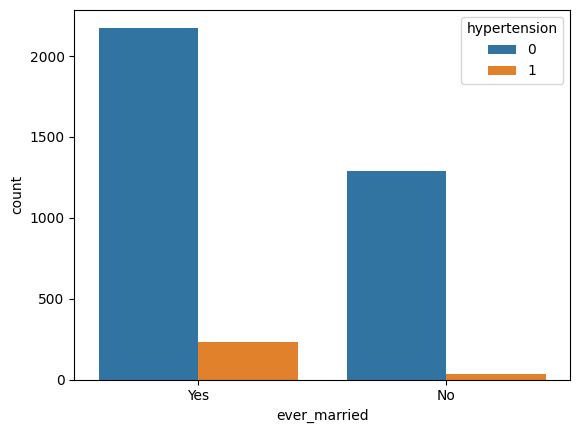

In [34]:
sns.countplot(data=df, x='ever_married', hue='hypertension')
plt.xticks(rotation=0)
plt.show()


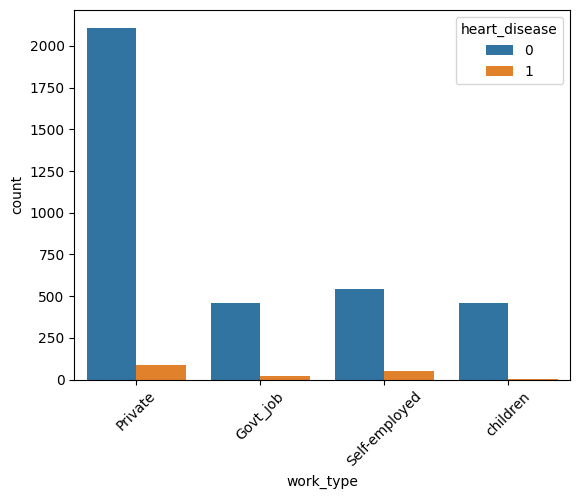

In [35]:
sns.countplot(data=df, x='work_type', hue='heart_disease')
plt.xticks(rotation=45)
plt.show()


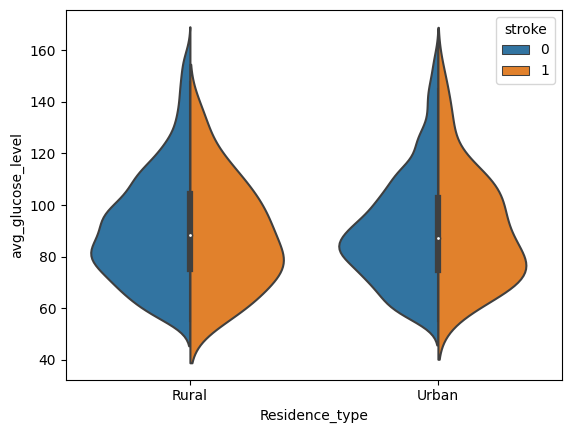

In [36]:
sns.violinplot(data=df, x='Residence_type', y='avg_glucose_level', hue='stroke', split=True)
plt.show()


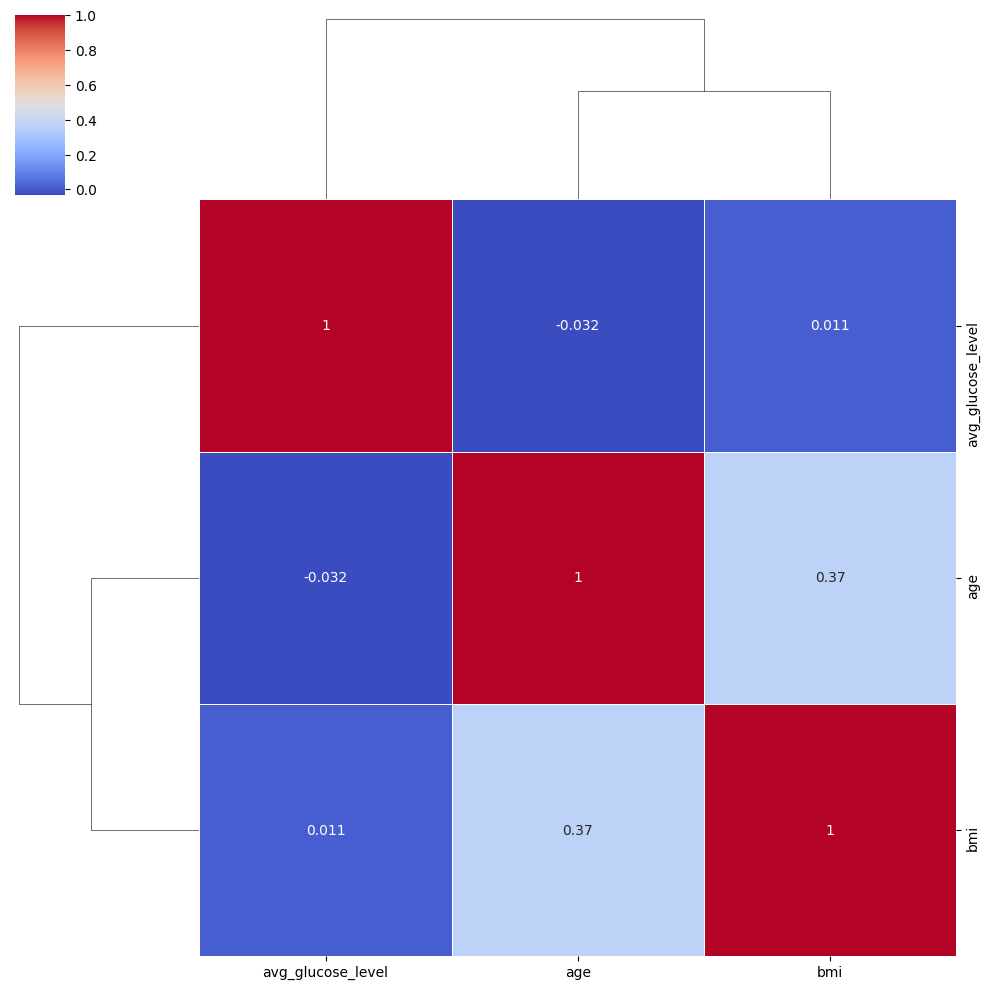

In [37]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


In [38]:
# Separate the data into categorical and continuous variables
categorical_cols = [ 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
continuous_cols = ['age', 'avg_glucose_level', 'bmi']

In [39]:
male_count = (df['gender'] == 'Male').sum()
female_count = (df['gender'] == 'Female').sum()


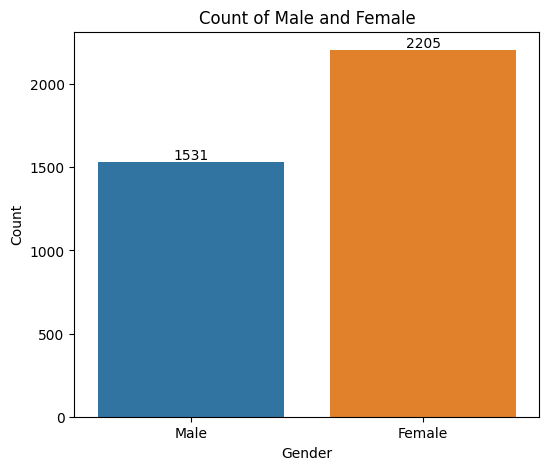

In [40]:
# Create a count plot
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='gender')
plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the counts above the bars
plt.text(0, male_count, male_count, ha='center', va='bottom')
plt.text(1, female_count, female_count, ha='center', va='bottom')

plt.show()

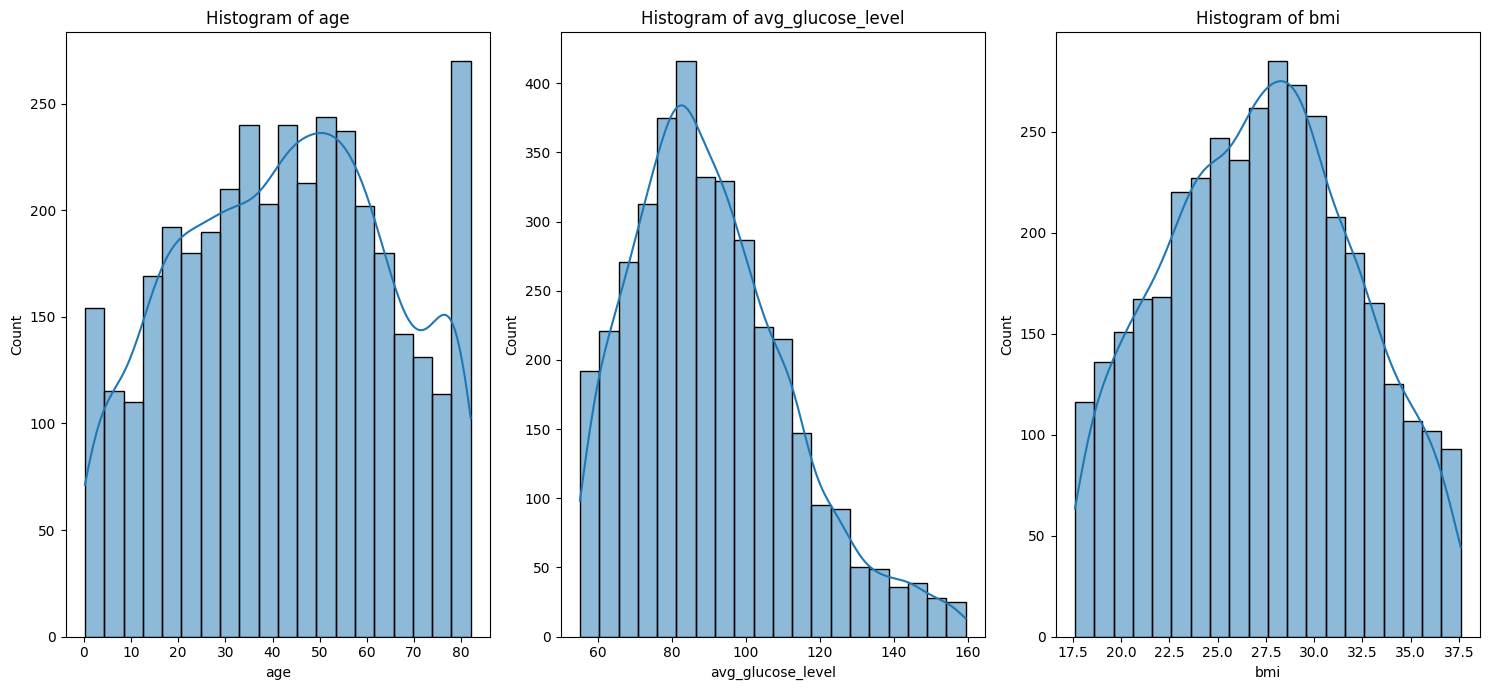

In [41]:
# Create histograms for continuous data
plt.figure(figsize=(15, 7))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [42]:
#descriptive statistics of the numerical variables
df[continuous_cols].describe().transpose()

count       mean        std    min    25%    50%      75%  \
age                3736.0  42.562505  22.094078   0.24  25.00  43.00   60.000   
avg_glucose_level  3736.0  90.738485  21.462881  55.12  74.96  87.83  103.465   
bmi                3736.0  27.227703   4.918115  17.60  23.50  27.30   30.825   

                      max  
age                 82.00  
avg_glucose_level  159.39  
bmi                 37.60

The figure layout has changed to tight


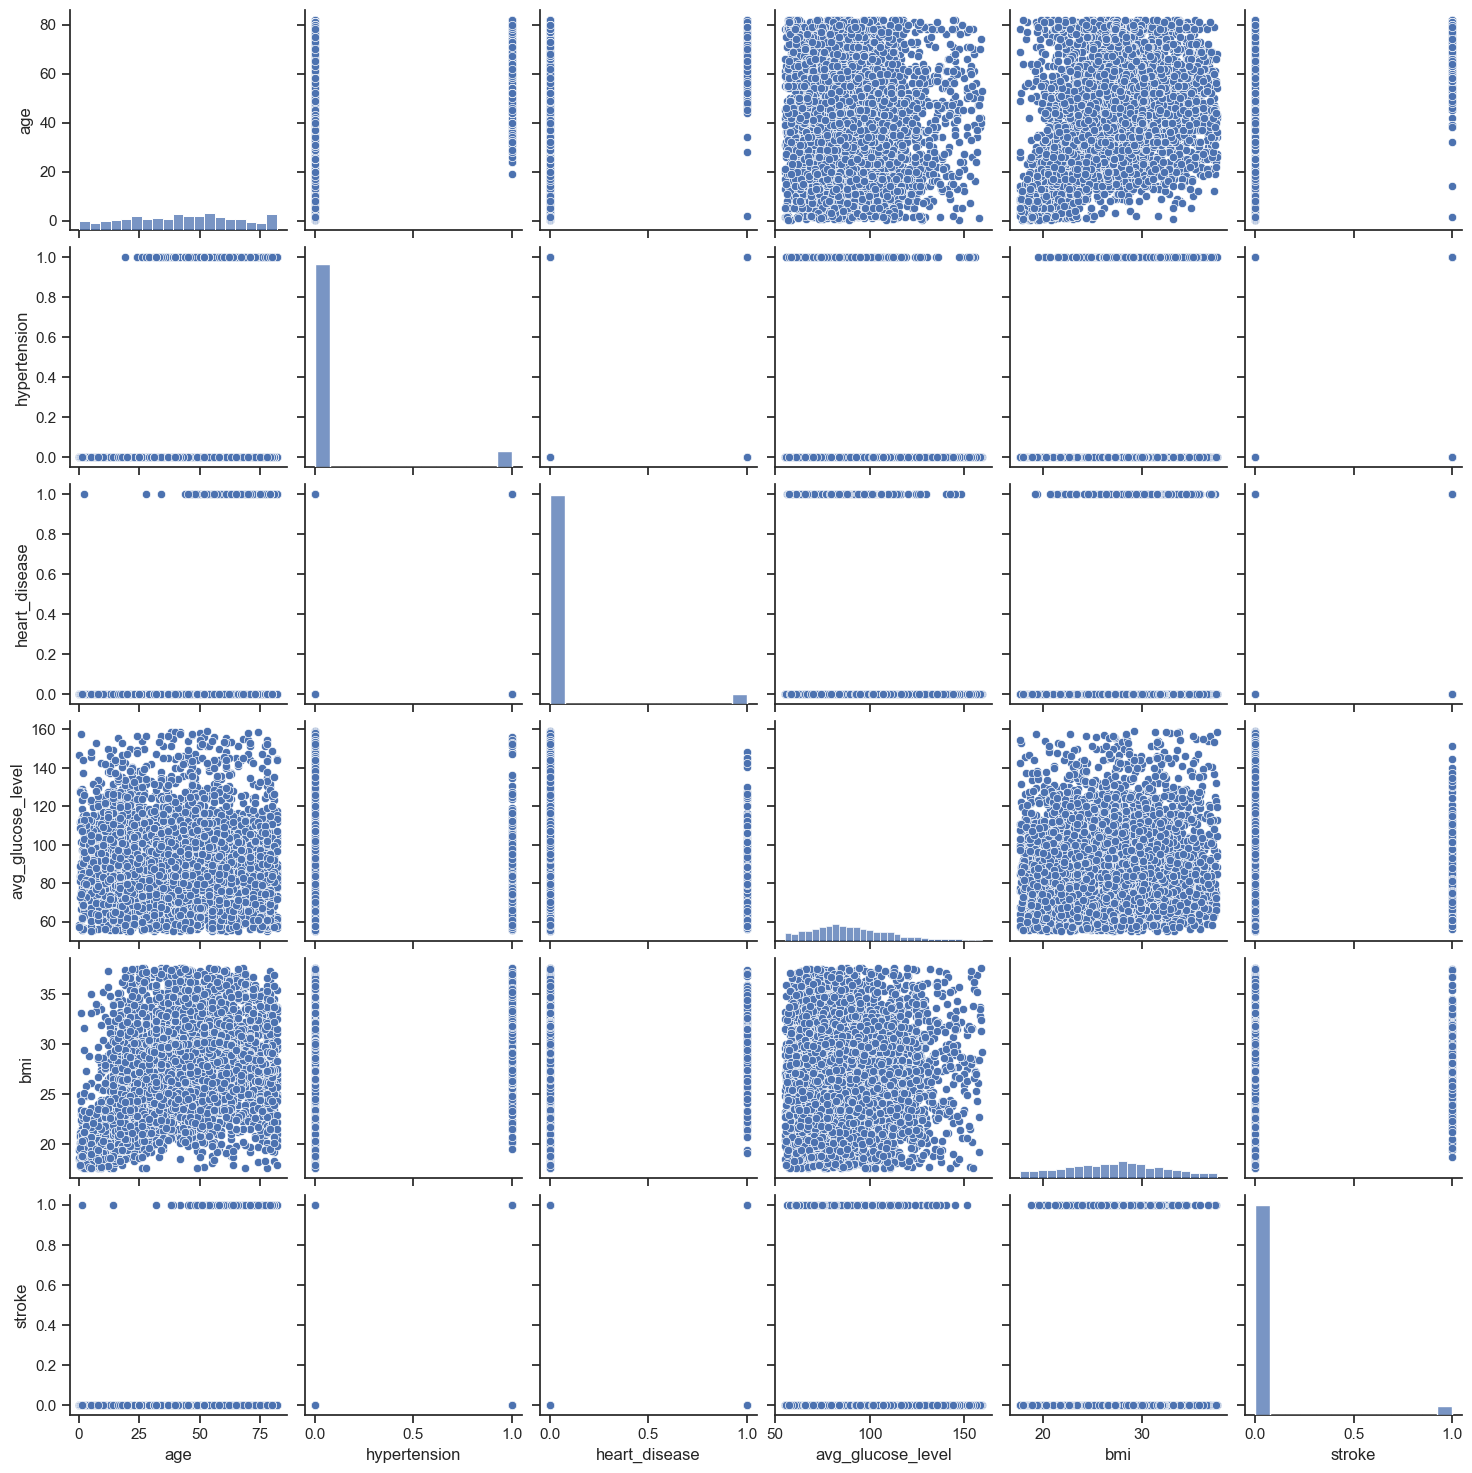

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with numerical columns
sns.set(style="ticks")
sns.pairplot(df)
plt.show()


In [44]:
import pandas as pd
from pandas_profiling import ProfileReport
prof = ProfileReport(df)


numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


In [45]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
filename = "C:\\Users\\Gihan\\Downloads\\archive (4)\\full_data.csv"
df = pd.read_csv(filename)
display(df)

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

## Feature Encoding & Preprocessing

In [47]:
from sklearn.preprocessing import OneHotEncoder
enco= OneHotEncoder()


In [48]:
feature_array= enco.fit_transform(df[['gender', 'ever_married', 'Residence_type']]).toarray()

In [49]:
feature_labels = enco.categories_

In [50]:
np.array(feature_labels).ravel()

array(['Female', 'Male', 'No', 'Yes', 'Rural', 'Urban'], dtype=object)

In [51]:
feature_labels= np.array(feature_labels).ravel()
print(feature_labels)

['Female' 'Male' 'No' 'Yes' 'Rural' 'Urban']


In [52]:
features= pd.DataFrame(feature_array, columns= feature_labels)

In [53]:
df= pd.concat([df, features], axis= 1)

In [54]:
print(df.columns)
df.head()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Female', 'Male', 'No', 'Yes', 'Rural',
       'Urban'],
      dtype='object')


gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Female  \
0          Urban             228.69  36.6  formerly smoked       1     0.0   
1          Rural             105.92  32.5     never smoked       1     0.0   
2          Urban             171.23  34.4           smokes       1     1.0   
3          Rural             174.12  24.0     never smoked       1     1.0   
4          Urban             186.21  29.0  formerly smoked       1     0.0   

   Male   No  Yes  Rural  Urban  
0   1.0  0.0  1.0    0.0    1.0  
1   1.0  0.0  1.0    1.0    0.0  
2   0.0  0.0  1.0    0.0    1.0  
3   0.0  0.0  1.0    1.0    0.0  
4   1.0  0.0  1.0    0.0    1.0

In [55]:
# Label Encoding (using scikit-learn's LabelEncoder)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])

In [56]:
df

gender   age  hypertension  heart_disease ever_married  work_type  \
0       Male  67.0             0              1          Yes          1   
1       Male  80.0             0              1          Yes          1   
2     Female  49.0             0              0          Yes          1   
3     Female  79.0             1              0          Yes          2   
4       Male  81.0             0              0          Yes          1   
...      ...   ...           ...            ...          ...        ...   
4976    Male  41.0             0              0           No          1   
4977    Male  40.0             0              0          Yes          1   
4978  Female  45.0             1              0          Yes          0   
4979    Male  40.0             0              0          Yes          1   
4980  Female  80.0             1              0          Yes          1   

     Residence_type  avg_glucose_level   bmi  smoking_status  stroke  Female  \
0             Urban             228.69  36.6               1       1     0.0   
1             Rural             105.92  32.5               2       1     0.0   
2             Urban             171.23  34.4               3       1     1.0   
3             Rural             174.12  24.0               2       1     1.0   
4             Urban             186.21  29.0               1       1     0.0   
...             ...                ...   ...             ...     ...     ...   
4976          Rural              70.15  29.8               1       0     0.0   
4977          Urban             191.15  31.1               3       0     0.0   
4978          Rural              95.02  31.8               3       0     1.0   
4979          Rural              83.94  30.0               3       0     0.0   
4980          Urban              83.75  29.1               2       0     1.0   

      Male   No  Yes  Rural  Urban  
0      1.0  0.0  1.0    0.0    1.0  
1      1.0  0.0  1.0    1.0    0.0  
2      0.0  0.0  1.0    0.0    1.0  
3      0.0  0.0  1.0    1.0    0.0  
4      1.0  0.0  1.0    0.0    1.0  
...    ...  ...  ...    ...    ...  
4976   1.0  1.0  0.0    1.0    0.0  
4977   1.0  0.0  1.0    0.0    1.0  
4978   0.0  0.0  1.0    1.0    0.0  
4979   1.0  0.0  1.0    1.0    0.0  
4980   0.0  0.0  1.0    0.0    1.0  

[4981 rows x 17 columns]

In [57]:
columns_to_drop = ['gender', 'ever_married', 'Residence_type']
df.drop(columns=columns_to_drop, inplace=True)


df.head()

age  hypertension  heart_disease  work_type  avg_glucose_level   bmi  \
0  67.0             0              1          1             228.69  36.6   
1  80.0             0              1          1             105.92  32.5   
2  49.0             0              0          1             171.23  34.4   
3  79.0             1              0          2             174.12  24.0   
4  81.0             0              0          1             186.21  29.0   

   smoking_status  stroke  Female  Male   No  Yes  Rural  Urban  
0               1       1     0.0   1.0  0.0  1.0    0.0    1.0  
1               2       1     0.0   1.0  0.0  1.0    1.0    0.0  
2               3       1     1.0   0.0  0.0  1.0    0.0    1.0  
3               2       1     1.0   0.0  0.0  1.0    1.0    0.0  
4               1       1     0.0   1.0  0.0  1.0    0.0    1.0

In [58]:
 

# Assuming 'df' is your DataFrame
columns_to_describe = ['age', 'avg_glucose_level', 'bmi']

for column in columns_to_describe:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")


Column: age, Min: 0.08, Max: 82.0
Column: avg_glucose_level, Min: 55.12, Max: 271.74
Column: bmi, Min: 14.0, Max: 48.9


### Handling Outliers

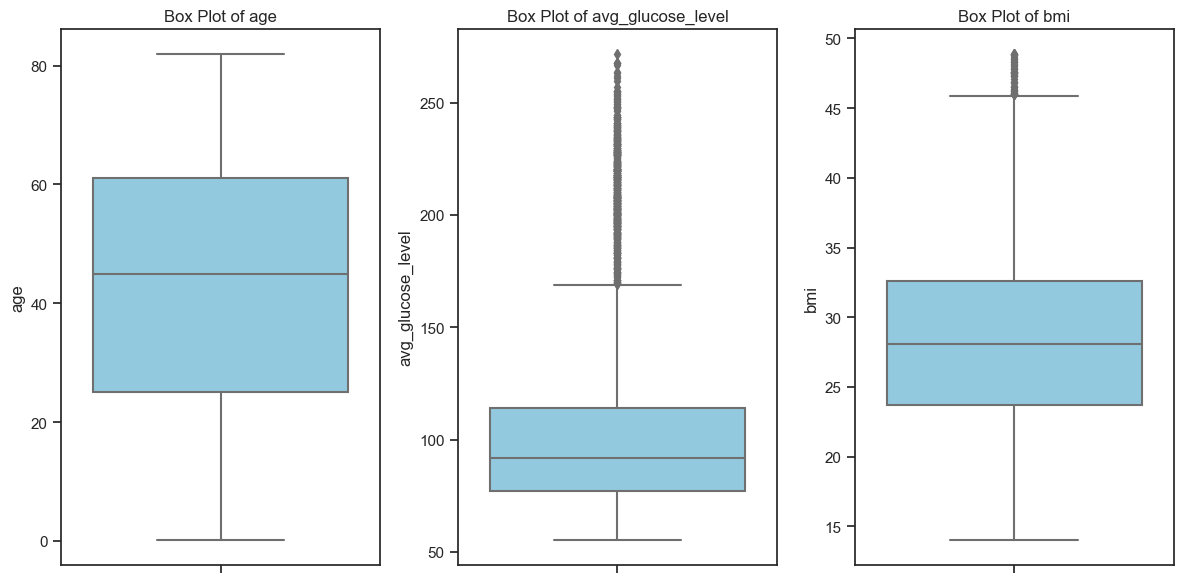

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


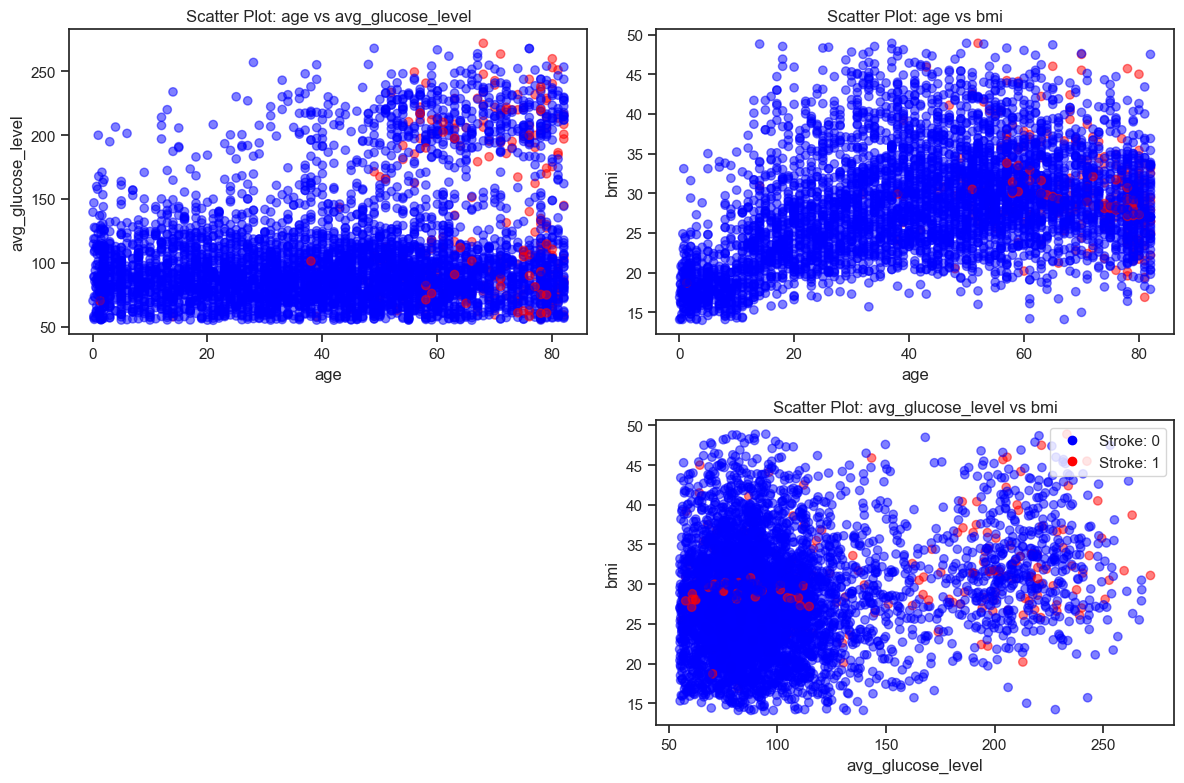

In [60]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
scatter_columns = ['age', 'avg_glucose_level', 'bmi']
colors = df['stroke'].map({0: 'blue', 1: 'red'})  # Map 'stroke' values to colors (0 to blue, 1 to red)

plt.figure(figsize=(12, 8))

# Create scatter plots for all pairs of selected features
for i in range(len(scatter_columns)):
    for j in range(i + 1, len(scatter_columns)):
        plt.subplot(2, 2, (i * 2) + (j - 1) + 1)  # Corrected the subplot index calculation
        plt.scatter(df[scatter_columns[i]], df[scatter_columns[j]], alpha=0.5, c=colors)
        plt.title(f'Scatter Plot: {scatter_columns[i]} vs {scatter_columns[j]}')
        plt.xlabel(scatter_columns[i])
        plt.ylabel(scatter_columns[j])

# Create a legend for the colors
legend_labels = [plt.Line2D([0], [0], marker='o', color=color, label=f'Stroke: {val}', linestyle='None') for val, color in zip([0, 1], ['blue', 'red'])]
plt.legend(handles=legend_labels, loc="upper right")

plt.tight_layout()
plt.show()


In [61]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Specify the columns you want to check for outliers
columns_to_check = ['age', 'avg_glucose_level', 'bmi']

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# df_cleaned now contains the dataset with outliers removed


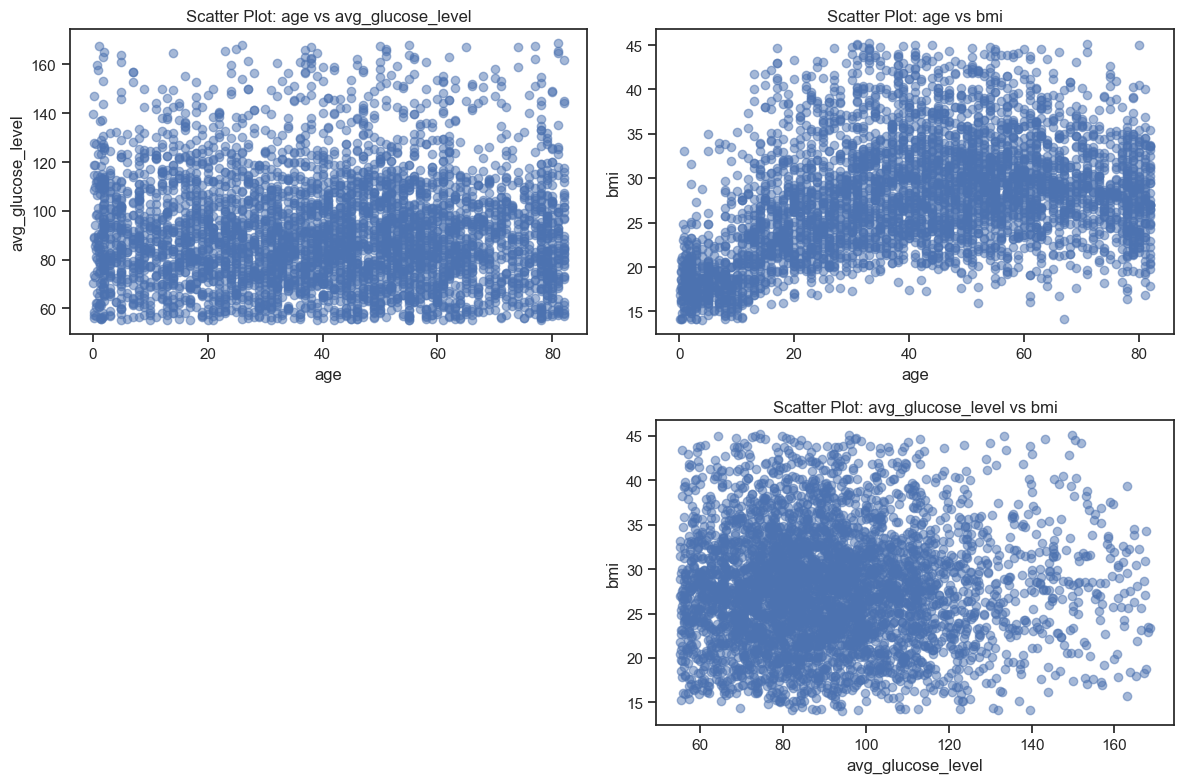

In [62]:
df = df_cleaned

import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your cleaned DataFrame
scatter_columns = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 8))

# Create scatter plots for all pairs of selected features
for i in range(len(scatter_columns)):
    for j in range(i + 1, len(scatter_columns)):
        plt.subplot(2, 2, (i * 2) + (j - 1) + 1)  # Corrected the subplot index calculation
        plt.scatter(df_cleaned[scatter_columns[i]], df_cleaned[scatter_columns[j]], alpha=0.5)
        plt.title(f'Scatter Plot: {scatter_columns[i]} vs {scatter_columns[j]}')
        plt.xlabel(scatter_columns[i])
        plt.ylabel(scatter_columns[j])

plt.tight_layout()
plt.show()


In [63]:
df

age  hypertension  heart_disease  work_type  avg_glucose_level   bmi  \
1     80.0             0              1          1             105.92  32.5   
5     74.0             1              1          1              70.09  27.4   
6     69.0             0              0          1              94.39  22.8   
7     78.0             0              0          1              58.57  24.2   
8     81.0             1              0          1              80.43  29.7   
...    ...           ...            ...        ...                ...   ...   
4974  58.0             0              0          0              84.94  30.2   
4976  41.0             0              0          1              70.15  29.8   
4978  45.0             1              0          0              95.02  31.8   
4979  40.0             0              0          1              83.94  30.0   
4980  80.0             1              0          1              83.75  29.1   

      smoking_status  stroke  Female  Male   No  Yes  Rural  Urban  
1                  2       1     0.0   1.0  0.0  1.0    1.0    0.0  
5                  2       1     0.0   1.0  0.0  1.0    1.0    0.0  
6                  2       1     1.0   0.0  1.0  0.0    0.0    1.0  
7                  0       1     1.0   0.0  0.0  1.0    0.0    1.0  
8                  2       1     1.0   0.0  0.0  1.0    1.0    0.0  
...              ...     ...     ...   ...  ...  ...    ...    ...  
4974               2       0     0.0   1.0  0.0  1.0    0.0    1.0  
4976               1       0     0.0   1.0  1.0  0.0    1.0    0.0  
4978               3       0     1.0   0.0  0.0  1.0    1.0    0.0  
4979               3       0     0.0   1.0  0.0  1.0    1.0    0.0  
4980               2       0     1.0   0.0  0.0  1.0    0.0    1.0  

[4337 rows x 14 columns]

# Scaling the dataframe

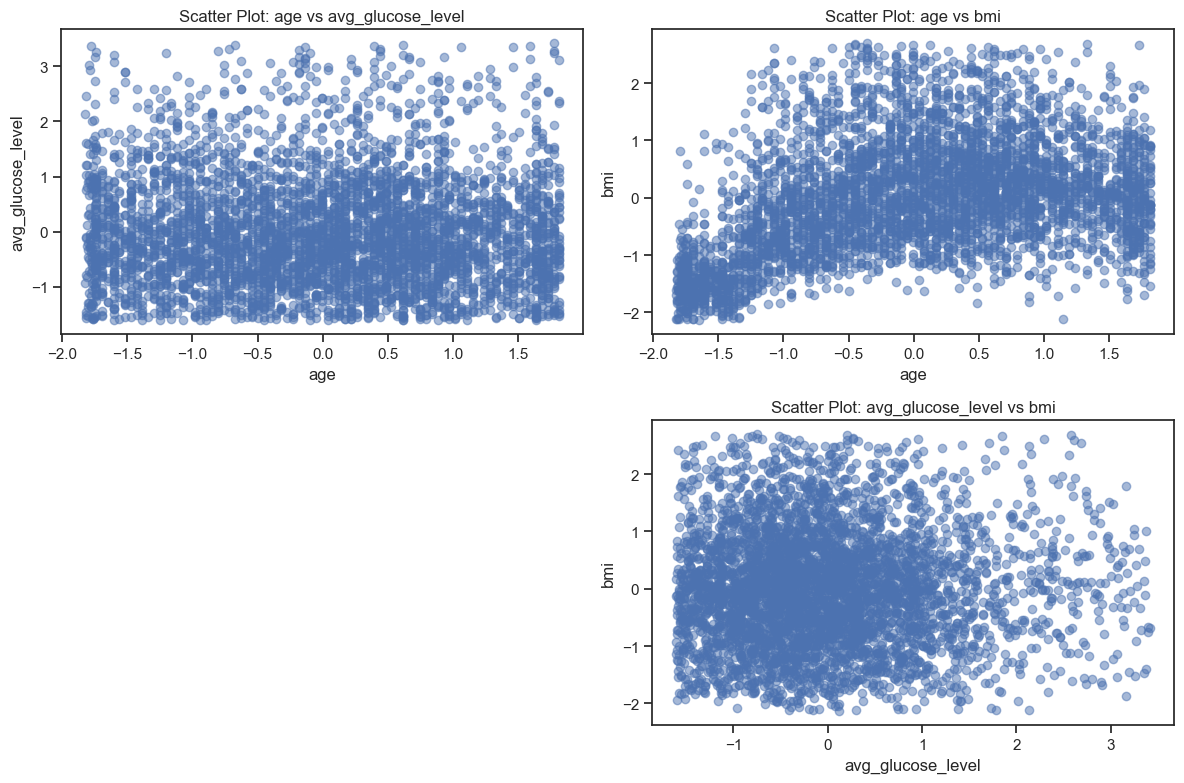

In [64]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'df_cleaned' is your cleaned DataFrame
scatter_columns = ['age', 'avg_glucose_level', 'bmi']

# Scale the selected columns using StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[scatter_columns] = scaler.fit_transform(df[scatter_columns])

plt.figure(figsize=(12, 8))

# Create scatter plots for all pairs of selected features
for i in range(len(scatter_columns)):
    for j in range(i + 1, len(scatter_columns)):
        plt.subplot(2, 2, (i * 2) + (j - 1) + 1)  # Corrected the subplot index calculation
        plt.scatter(df_scaled[scatter_columns[i]], df_scaled[scatter_columns[j]], alpha=0.5)
        plt.title(f'Scatter Plot: {scatter_columns[i]} vs {scatter_columns[j]}')
        plt.xlabel(scatter_columns[i])
        plt.ylabel(scatter_columns[j])

plt.tight_layout()
plt.show()


In [109]:
numeric_columns_scaled =df_scaled[scatter_columns]
numeric_columns_scaled

age  avg_glucose_level       bmi
1     1.727531           0.640396  0.728890
5     1.460839          -0.945433 -0.061273
6     1.238595           0.130081 -0.773969
7     1.638634          -1.455307 -0.557062
8     1.771980          -0.487787  0.295075
...        ...                ...       ...
4974  0.749658          -0.288175  0.372542
4976 -0.005972          -0.942778  0.310568
4978  0.171823           0.157964  0.620436
4979 -0.050421          -0.332435  0.341555
4980  1.727531          -0.340844  0.202114

[4337 rows x 3 columns]

In [111]:
# Save the subset DataFrame as a joblib file
joblib.dump(numeric_columns_scaled, 'numeric_df_scaled.joblib')

['numeric_df_scaled.joblib']

In [65]:
df=df_scaled

In [66]:
df

age  hypertension  heart_disease  work_type  avg_glucose_level  \
1     1.727531             0              1          1           0.640396   
5     1.460839             1              1          1          -0.945433   
6     1.238595             0              0          1           0.130081   
7     1.638634             0              0          1          -1.455307   
8     1.771980             1              0          1          -0.487787   
...        ...           ...            ...        ...                ...   
4974  0.749658             0              0          0          -0.288175   
4976 -0.005972             0              0          1          -0.942778   
4978  0.171823             1              0          0           0.157964   
4979 -0.050421             0              0          1          -0.332435   
4980  1.727531             1              0          1          -0.340844   

           bmi  smoking_status  stroke  Female  Male   No  Yes  Rural  Urban  
1     0.728890               2       1     0.0   1.0  0.0  1.0    1.0    0.0  
5    -0.061273               2       1     0.0   1.0  0.0  1.0    1.0    0.0  
6    -0.773969               2       1     1.0   0.0  1.0  0.0    0.0    1.0  
7    -0.557062               0       1     1.0   0.0  0.0  1.0    0.0    1.0  
8     0.295075               2       1     1.0   0.0  0.0  1.0    1.0    0.0  
...        ...             ...     ...     ...   ...  ...  ...    ...    ...  
4974  0.372542               2       0     0.0   1.0  0.0  1.0    0.0    1.0  
4976  0.310568               1       0     0.0   1.0  1.0  0.0    1.0    0.0  
4978  0.620436               3       0     1.0   0.0  0.0  1.0    1.0    0.0  
4979  0.341555               3       0     0.0   1.0  0.0  1.0    1.0    0.0  
4980  0.202114               2       0     1.0   0.0  0.0  1.0    0.0    1.0  

[4337 rows x 14 columns]

## Handling Imbalance Data

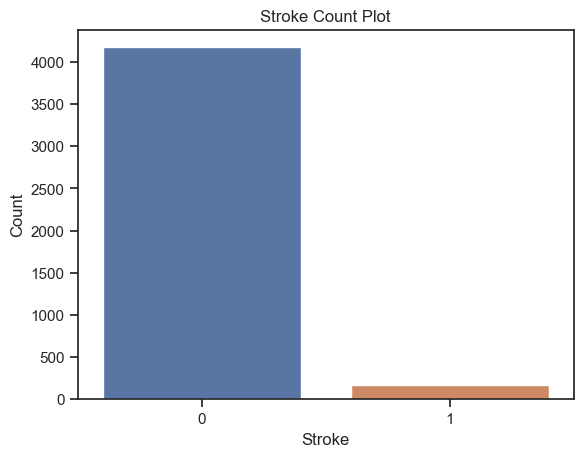

In [67]:
plt.figure()
sns.countplot(x='stroke', data=df)
plt.title('Stroke Count Plot')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


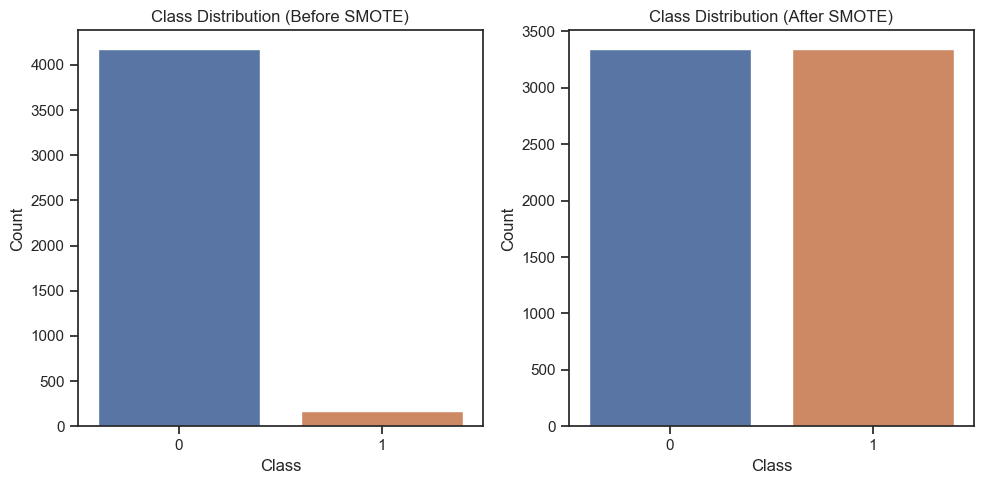

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def apply_smote_and_plot(df):
    # Split the data into features (X) and the 'stroke' target variable (y)
    X = df.drop('stroke', axis=1)  # Features (independent variables)
    y = df['stroke']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

def visualize_class_distribution(y_original, y_resampled):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Count the original class distribution
    class_counts_original = y_original.value_counts()

    # Count the resampled class distribution
    class_counts_resampled = y_resampled.value_counts()

    # Create a bar plot to visualize the class distribution before and after SMOTE
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.barplot(x=class_counts_original.index, y=class_counts_original.values)
    plt.title("Class Distribution (Before SMOTE)")
    plt.xlabel("Class")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values)
    plt.title("Class Distribution (After SMOTE)")
    plt.xlabel("Class")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()



# Apply SMOTE and get the resampled data
X_resampled, y_resampled = apply_smote_and_plot(df)

# Visualize the class distribution before and after SMOTE
visualize_class_distribution(df['stroke'], y_resampled)


In [69]:
X = df.drop('stroke', axis=1)  # Features (independent variables)
y = df['stroke']  # Target variable

from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [70]:
df= df_scaled

## Model Selection & Evaluation

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate the F1 score

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Accuracy: 0.9425149700598803

Confusion Matrix:
 [[764  68]
 [ 28 810]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       832
           1       0.92      0.97      0.94       838

    accuracy                           0.94      1670
   macro avg       0.94      0.94      0.94      1670
weighted avg       0.94      0.94      0.94      1670


F1 Score: 0.9440559440559441


In [72]:
import joblib

# Save the model to a file
joblib.dump(rf_classifier, 'rf_classifier.joblib')


['rf_classifier.joblib']

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics for the best model
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9479041916167664

Confusion Matrix:
 [[771  61]
 [ 26 812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       832
           1       0.93      0.97      0.95       838

    accuracy                           0.95      1670
   macro avg       0.95      0.95      0.95      1670
weighted avg       0.95      0.95      0.95      1670


F1 Score: 0.9491525423728813


In [74]:
import joblib


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Create a Random Forest Classifier model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,   
)

# Train the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics for the best model
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Accuracy: 0.9473053892215569

Confusion Matrix:
 [[770  62]
 [ 26 812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       832
           1       0.93      0.97      0.95       838

    accuracy                           0.95      1670
   macro avg       0.95      0.95      0.95      1670
weighted avg       0.95      0.95      0.95      1670


F1 Score: 0.9485981308411215


In [103]:
# Save the model to a file
joblib.dump(best_rf_classifier, 'best_rf_classifier.joblib')

['best_rf_classifier.joblib']

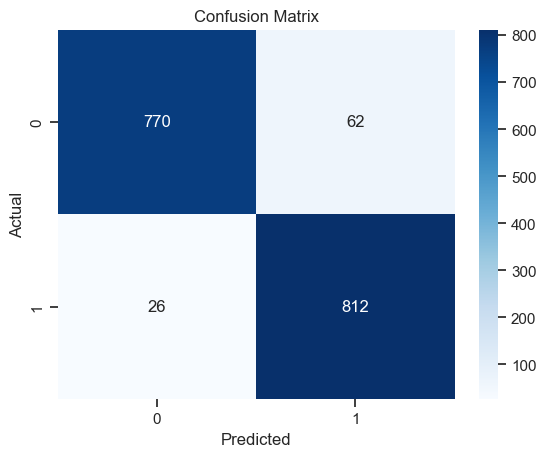

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


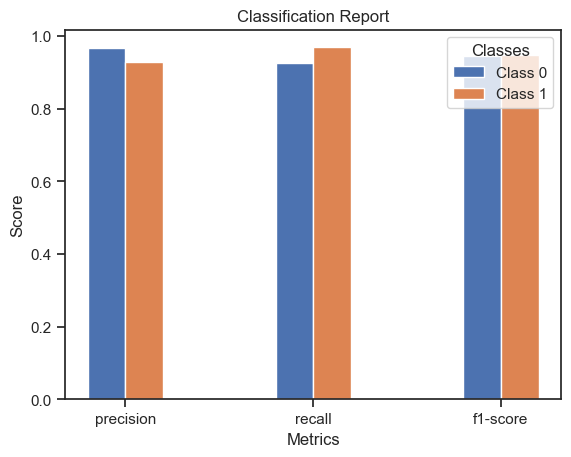

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

class_labels = ['0', '1']
metrics = ['precision', 'recall', 'f1-score']

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

values = []

for label in class_labels:
    class_metrics = [report[label][metric] for metric in metrics]
    values.append(class_metrics)

values = np.array(values)

# Create the bar chart
fig, ax = plt.subplots()
width = 0.2
x = np.arange(len(metrics))

for i, label in enumerate(class_labels):
    ax.bar(x + i * width, values[i], width, label=f'Class {label}')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Classification Report')
ax.set_xticks(x + width * (len(class_labels) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend(title='Classes')
plt.show()


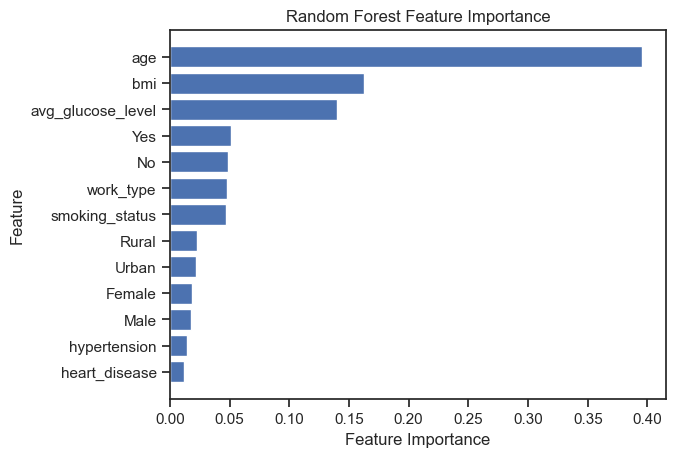

In [78]:
importances = best_rf_classifier.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = importances.argsort()

plt.barh(range(X.shape[1]), importances[sorted_idx], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


In [79]:
import shap

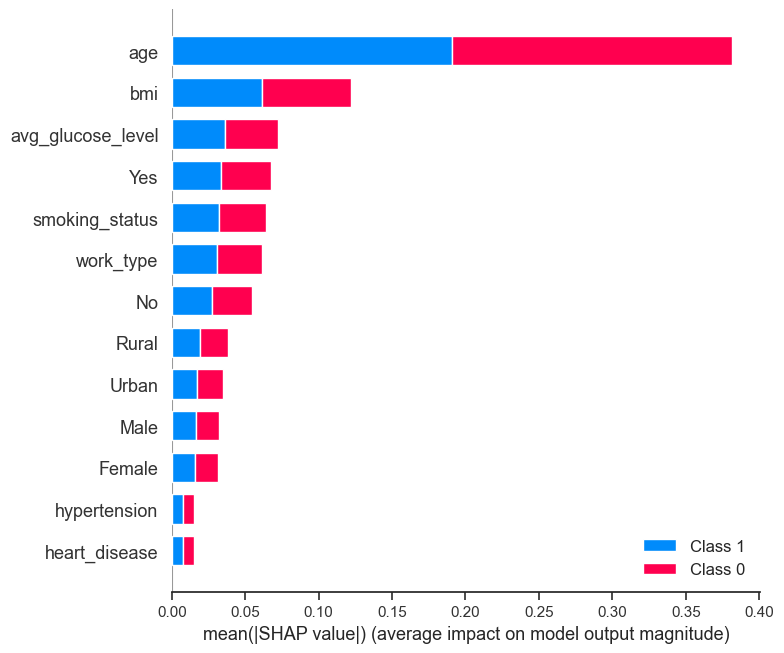

In [80]:
explainer = shap.TreeExplainer(best_rf_classifier)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


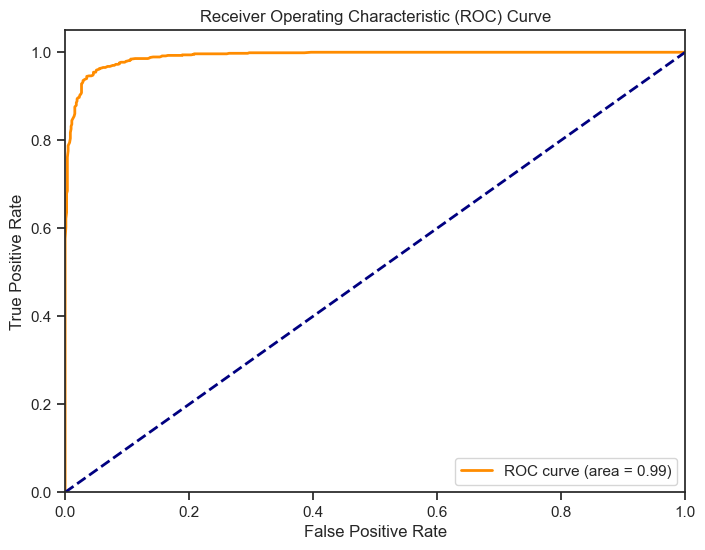

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Assuming you have already trained your model and obtained predicted probabilities
y_pred_prob = best_rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [83]:
# Save the plot as a PNG file
plt.savefig("shap_force_plot.png", format="png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Support Vector Classifier model
svc_classifier = SVC(probability=True)  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Train the model on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Accuracy: 0.8694610778443114

Confusion Matrix:
 [[664 168]
 [ 50 788]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       832
           1       0.82      0.94      0.88       838

    accuracy                           0.87      1670
   macro avg       0.88      0.87      0.87      1670
weighted avg       0.88      0.87      0.87      1670


F1 Score: 0.8784838350055743


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


# Define a simplified parameter grid
param_grid = {
    'C': [1, 10],  # Simplified regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Simplified kernel types
    'gamma': ['scale', 'auto'],  # Simplified kernel coefficient
}

# Create a Support Vector Classifier model
svc_classifier = SVC()

# Create GridSearchCV with 3-fold cross-validation (reduce folds for quicker results)
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from the grid search
best_svc_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_svc_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics for the best model
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9

Confusion Matrix:
 [[692 140]
 [ 27 811]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       832
           1       0.85      0.97      0.91       838

    accuracy                           0.90      1670
   macro avg       0.91      0.90      0.90      1670
weighted avg       0.91      0.90      0.90      1670


F1 Score: 0.9066517607602013


In [86]:
from sklearn.svm import SVC

# Create an SVC model with the best hyperparameters
best_svc_classifier = SVC(C=10, kernel='rbf', gamma='scale')

# Train the model on the entire dataset (X, y)
best_svc_classifier.fit(X_resampled, y_resampled)

# Make predictions using the trained model
y_pred = best_svc_classifier.predict(X_test)

# Evaluate the model on the entire dataset (or use a separate test set)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics for the best model
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Accuracy: 0.9125748502994012

Confusion Matrix:
 [[706 126]
 [ 20 818]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       832
           1       0.87      0.98      0.92       838

    accuracy                           0.91      1670
   macro avg       0.92      0.91      0.91      1670
weighted avg       0.92      0.91      0.91      1670


F1 Score: 0.9180695847362514


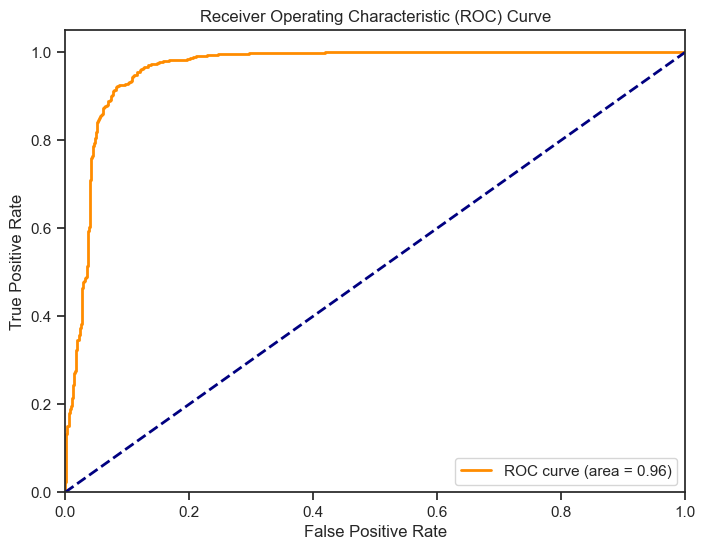

In [87]:
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Assuming you have already trained your best_svc_classifier and obtained predicted probabilities
y_pred_prob = best_svc_classifier.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')



In [88]:
from sklearn.inspection import permutation_importance

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(best_svc_classifier, X_resampled, y_resampled, n_repeats=30, random_state=0)

# Get feature importance scores
importance_scores = perm_importance.importances_mean



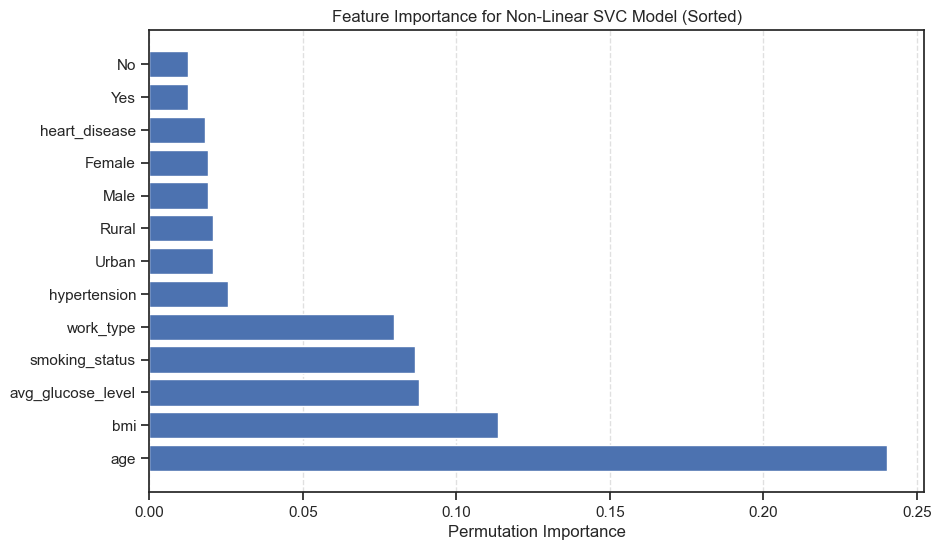

In [89]:
# Sort the importance scores and feature names together
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
# Create a bar plot for sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for Non-Linear SVC Model (Sorted)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


# Split the data into features (X) and the target variable (y)
X = df.drop('stroke', axis=1)  # Features (independent variables)
y = df['stroke']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Accuracy: 0.8748502994011976

Confusion Matrix:
 [[702 130]
 [ 79 759]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       832
           1       0.85      0.91      0.88       838

    accuracy                           0.87      1670
   macro avg       0.88      0.87      0.87      1670
weighted avg       0.88      0.87      0.87      1670


F1 Score: 0.8789808917197452


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (step size shrinkage)
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
     
}

# Create a Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from the grid search
best_gb_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_gb_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics for the best model
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9688622754491018

Confusion Matrix:
 [[816  16]
 [ 36 802]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       832
           1       0.98      0.96      0.97       838

    accuracy                           0.97      1670
   macro avg       0.97      0.97      0.97      1670
weighted avg       0.97      0.97      0.97      1670


F1 Score: 0.9685990338164251


In [112]:
X_train

age  hypertension  heart_disease  work_type  avg_glucose_level  \
1153 -0.894948             0              0          1           0.731572   
198  -0.894948             0              0          1          -0.089006   
2860 -1.339436             0              0          3          -0.963580   
4664  1.383680             0              0          1           0.463369   
4955  1.036297             0              0          1          -1.009250   
...        ...           ...            ...        ...                ...   
5734 -0.269647             0              0          1          -0.540186   
5191  1.666751             0              0          2          -0.453506   
5390  1.528980             0              0          2           0.657852   
860   0.260721             0              0          1           2.238176   
7270  0.438859             0              0          1           0.644946   

           bmi  smoking_status  Female  Male        No       Yes    Rural  \
1153 -0.138740               2     1.0   0.0  1.000000  0.000000  1.00000   
198  -0.913410               3     1.0   0.0  1.000000  0.000000  1.00000   
2860 -2.075415               0     1.0   0.0  1.000000  0.000000  0.00000   
4664  0.158234               0     0.0   1.0  0.000000  1.000000  0.00000   
4955  0.284462               0     0.0   1.0  0.000000  1.000000  0.00000   
...        ...             ...     ...   ...       ...       ...      ...   
5734  0.081611               2     1.0   0.0  0.000000  1.000000  0.56173   
5191  0.385546               2     0.0   1.0  0.000000  1.000000  1.00000   
5390 -0.393008               1     0.0   1.0  0.000000  1.000000  1.00000   
860   0.341555               0     0.0   1.0  0.000000  1.000000  1.00000   
7270  0.516689               3     0.0   1.0  0.832691  0.167309  1.00000   

        Urban  
1153  0.00000  
198   0.00000  
2860  1.00000  
4664  1.00000  
4955  1.00000  
...       ...  
5734  0.43827  
5191  0.00000  
5390  0.00000  
860   0.00000  
7270  0.00000  

[6676 rows x 13 columns]

In [92]:
import joblib

# Save the best Gradient Boosting Classifier model to a file
model_filename = "best_gb_classifier_model.pkl"
joblib.dump(best_gb_classifier, model_filename)

['best_gb_classifier_model.pkl']

In [104]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(
    learning_rate=0.02,
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    
)

# Train the model on the training data
best_gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nF1 Score:", f1)


Accuracy: 0.9

Confusion Matrix:
 [[713 119]
 [ 48 790]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       832
           1       0.87      0.94      0.90       838

    accuracy                           0.90      1670
   macro avg       0.90      0.90      0.90      1670
weighted avg       0.90      0.90      0.90      1670


F1 Score: 0.9044075558099599


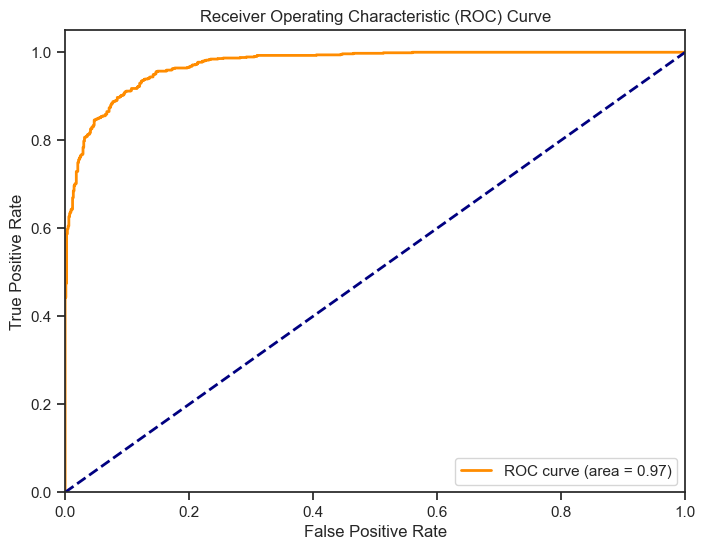

In [94]:
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Assuming you have trained your best_gb_classifier and obtained predicted probabilities
y_pred_prob = best_gb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')




Text(0.5, 0, 'Predicted')

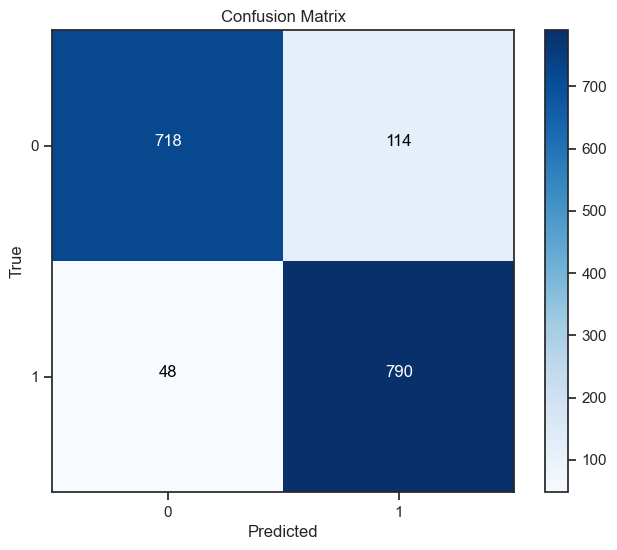

In [95]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.ylabel('True')
plt.xlabel('Predicted')



In [96]:
# Assuming you have shap values for binary classification
shap.initjs()
explainer = shap.Explainer(best_gb_classifier)
shap_values = explainer(X_test)




In [97]:
import shap

# Create a SHAP explainer for your model
explainer = shap.TreeExplainer(best_gb_classifier)

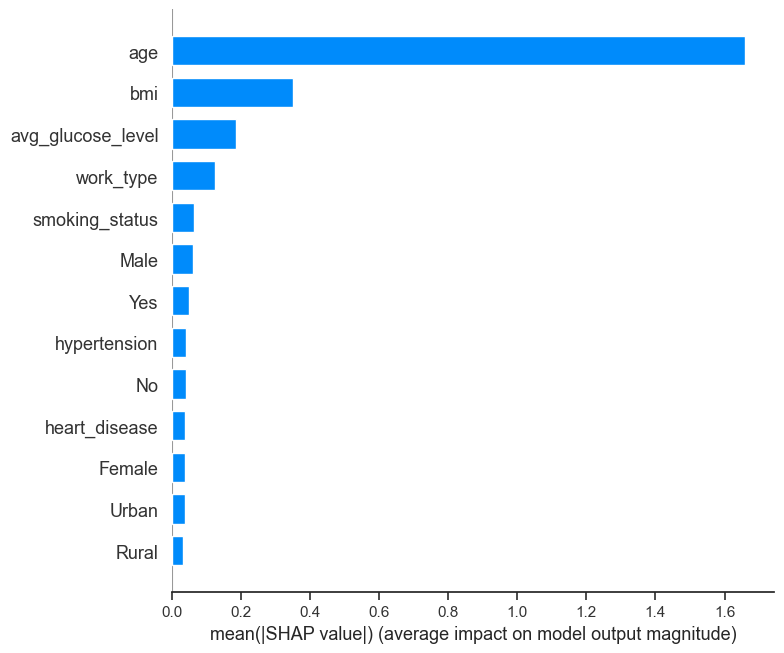

In [98]:
# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Summarize the impact of each feature on the model's output
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

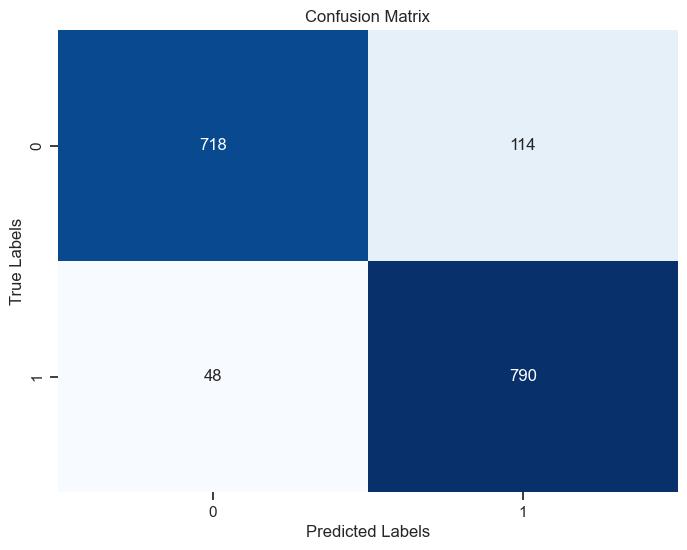

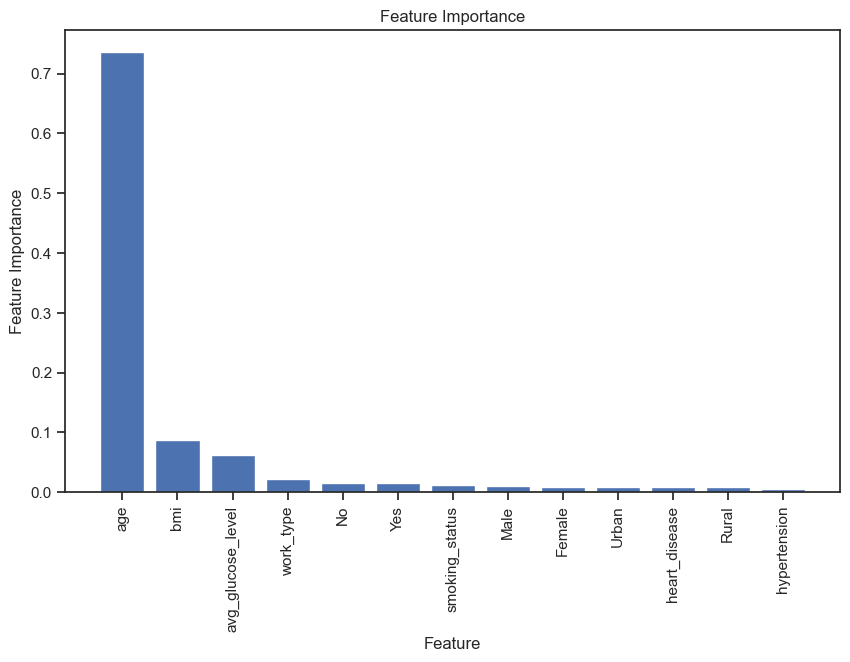

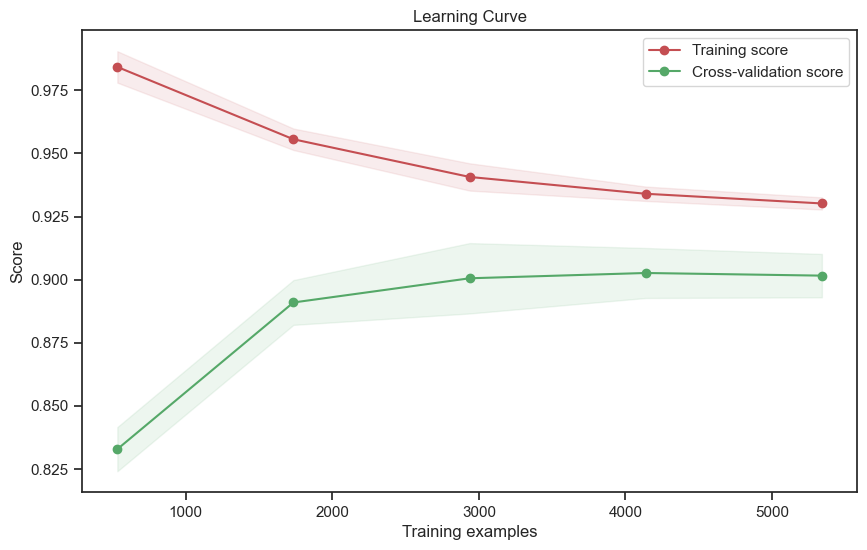

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve

# Assuming you already have the best_gb_classifier and X_test, y_test from previous code

# 1. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 2. Feature Importance
# Get feature importances from the best model
feature_importance = best_gb_classifier.feature_importances_

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Get the feature names
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.show()

# 3. Learning Curve
# Create a learning curve plot
train_sizes, train_scores, test_scores = learning_curve(
    best_gb_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation for train and test scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


In [100]:
explainer = shap.TreeExplainer(best_gb_classifier)


In [101]:
shap_values = explainer.shap_values(X_test)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


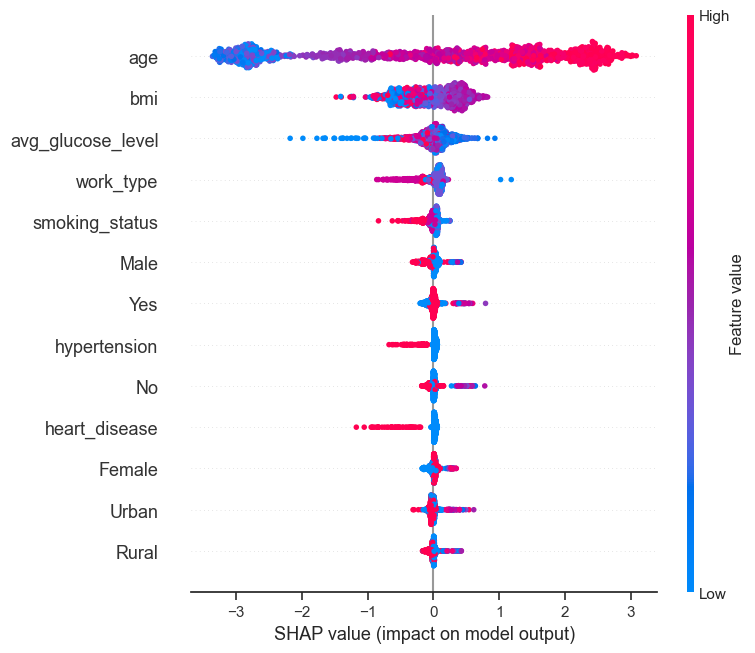

In [102]:
shap.summary_plot(shap_values, X_test)
